In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [ ]:
train.shape, test.shape

((7000, 24), (3000, 23))

In [ ]:
train.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [ ]:
test.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [ ]:
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


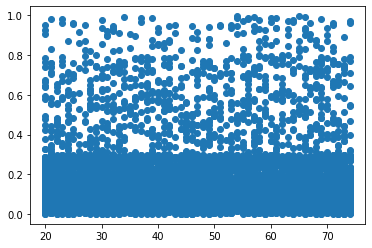

In [ ]:
plt.scatter(train['growth_rate'], train['Attrition_rate'])
plt.show()

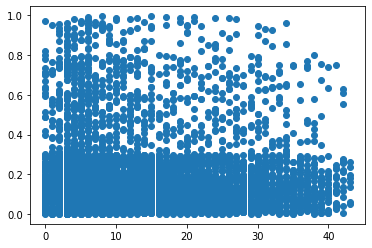

In [ ]:
plt.scatter(train['Time_of_service'], train['Attrition_rate'])
plt.show()

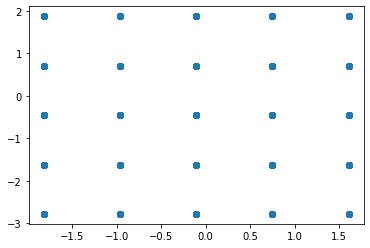

In [ ]:
plt.scatter(train['VAR2'], train['VAR3'])
plt.show()

In [ ]:
df = pd.DataFrame(train[['VAR1','VAR2','VAR3','VAR4','VAR5','VAR6','VAR7']])

In [ ]:
df.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,4,0.7516,1.8688,2.0,4,5,3
1,3,-0.9612,-0.4537,2.0,3,5,3
2,4,-0.9612,-0.4537,3.0,3,8,3
3,3,-1.8176,-0.4537,NaN,3,7,3
4,1,0.7516,-0.4537,2.0,2,8,2


In [ ]:
df.isnull().sum()

VAR1      0
VAR2    577
VAR3      0
VAR4    656
VAR5      0
VAR6      0
VAR7      0
dtype: int64

In [ ]:
df['VAR2'] = df['VAR2'].fillna(df['VAR2'].mean)
df['VAR4'] = df['VAR4'].fillna(df['VAR4'].mean)

In [ ]:
df['VAR2'] = df['VAR2'].fillna(df['VAR2'].median)
df['VAR4'] = df['VAR4'].fillna(df['VAR4'].median)

In [ ]:
df.columns

Index(['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VAR1    7000 non-null   int64  
 1   VAR2    7000 non-null   object 
 2   VAR3    7000 non-null   float64
 3   VAR4    7000 non-null   object 
 4   VAR5    7000 non-null   int64  
 5   VAR6    7000 non-null   int64  
 6   VAR7    7000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 382.9+ KB


In [ ]:
df['VAR2'] = pd.to_numeric(df['VAR2'], errors='coerce')

In [ ]:
df.corr()

,VAR1,VAR3,VAR5,VAR6,VAR7
VAR1,1.000000,-0.003318,0.007904,-0.002771,0.009355
VAR3,-0.003318,1.000000,-0.003399,0.005096,0.008390
VAR5,0.007904,-0.003399,1.000000,-0.005412,0.009436
VAR6,-0.002771,0.005096,-0.005412,1.000000,0.011908
VAR7,0.009355,0.008390,0.009436,0.011908,1.000000


In [ ]:
df['VAR2'].isnull().sum()

0

In [ ]:
frames = [train, test]
comb = pd.concat(frames)

In [ ]:
comb.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [ ]:
comb.shape

(10000, 24)

In [ ]:
comb.isnull().sum()

Employee_ID                     0
Gender                          0
Age                           573
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service               196
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                      12
Compensation_and_Benefits       0
Work_Life_balance              16
VAR1                            0
VAR2                          794
VAR3                            0
VAR4                          954
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

In [ ]:
train_dr = train.dropna()

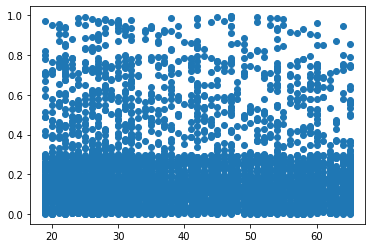

In [ ]:
plt.scatter(comb['Age'], comb['Attrition_rate'])
plt.show()

In [ ]:
comb['Age'].median()

38.0

In [ ]:
comb['Age'] = comb['Age'].fillna(comb['Age'].mean())

In [ ]:
comb['Age'].isnull().sum()

0

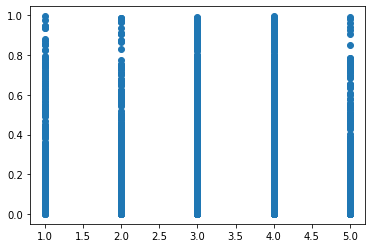

In [ ]:
plt.scatter(comb['Education_Level'], comb['Attrition_rate'])
plt.show()

In [ ]:
comb['Education_Level'].value_counts()

3    4063
4    3018
2     982
1     979
5     958
Name: Education_Level, dtype: int64

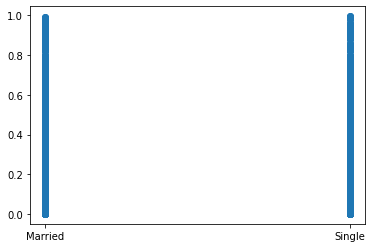

In [ ]:
plt.scatter(comb['Relationship_Status'], comb['Attrition_rate'])
plt.show()

In [ ]:
comb['Relationship_Status'].value_counts()

Married    6461
Single     3539
Name: Relationship_Status, dtype: int64

In [ ]:
comb['Hometown'].value_counts()

Lebanon        2953
Springfield    2484
Franklin       2181
Washington     1570
Clinton         812
Name: Hometown, dtype: int64

In [ ]:
comb['Unit'].value_counts()

IT                           1963
Logistics                    1648
Sales                        1389
Operarions                   1008
R&D                           991
Purchasing                    714
Accounting and Finance        679
Human Resource Management     513
Marketing                     319
Production                    292
Quality                       290
Security                      194
Name: Unit, dtype: int64

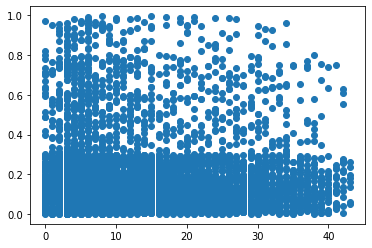

In [ ]:
plt.scatter(train['Time_of_service'], train['Attrition_rate'])
plt.show()

In [ ]:
#train['Time_of_service'].value_counts()
#comb['Time_of_service'].value_counts()
comb['Time_of_service'].mean()

13.390656874745002

In [ ]:
comb['Time_of_service'] = comb['Time_of_service'].fillna(comb['Time_of_service'].mean())

In [ ]:
comb['Pay_Scale'].value_counts()

8.0     1964
6.0     1820
5.0     1640
4.0     1405
7.0     1163
9.0      703
2.0      383
3.0      366
10.0     314
1.0      230
Name: Pay_Scale, dtype: int64

In [ ]:
comb['Pay_Scale'] = comb['Pay_Scale'].fillna(8.0)

In [ ]:
comb['Work_Life_balance'].value_counts()

1.0    2951
3.0    2858
2.0    2287
4.0    1719
5.0     169
Name: Work_Life_balance, dtype: int64

In [ ]:
comb['Work_Life_balance'] = comb['Work_Life_balance'].fillna(1.0)

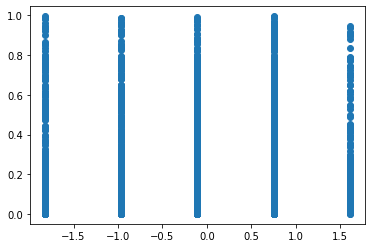

In [ ]:
plt.scatter(comb['VAR2'], comb['Attrition_rate'])
plt.show()

In [ ]:
comb['VAR2'].value_counts()

 0.7516    3582
-0.1048    2288
-0.9612    1469
-1.8176    1173
 1.6081     694
Name: VAR2, dtype: int64

In [ ]:
comb['VAR2'].median()

-0.1048

In [ ]:
comb['VAR2'] = comb['VAR2'].fillna(comb['VAR2'].median())

In [ ]:
comb['VAR4'].value_counts()

2.0    6369
1.0    1809
3.0     868
Name: VAR4, dtype: int64

In [ ]:
comb['VAR4'] = comb['VAR4'].fillna(comb['VAR4'].median())

In [ ]:
comb.isnull().sum()

Employee_ID                     0
Gender                          0
Age                             0
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service                 0
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                       0
Compensation_and_Benefits       0
Work_Life_balance               0
VAR1                            0
VAR2                            0
VAR3                            0
VAR4                            0
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

In [ ]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                10000 non-null  object 
 1   Gender                     10000 non-null  int64  
 2   Age                        10000 non-null  float64
 3   Education_Level            10000 non-null  int64  
 4   Relationship_Status        10000 non-null  int64  
 5   Hometown                   10000 non-null  int64  
 6   Unit                       10000 non-null  int64  
 7   Decision_skill_possess     10000 non-null  int64  
 8   Time_of_service            10000 non-null  float64
 9   Time_since_promotion       10000 non-null  int64  
 10  growth_rate                10000 non-null  int64  
 11  Travel_Rate                10000 non-null  int64  
 12  Post_Level                 10000 non-null  int64  
 13  Pay_Scale                  10000 non-null  floa

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [ ]:
comb.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [ ]:

from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
comb['Gender'] = labelencoder.fit_transform(comb['Gender'])

In [ ]:
comb['Relationship_Status'] = labelencoder.fit_transform(comb['Relationship_Status'])
comb['Hometown'] = labelencoder.fit_transform(comb['Hometown'])
comb['Unit'] = labelencoder.fit_transform(comb['Unit'])
comb['Decision_skill_possess'] = labelencoder.fit_transform(comb['Decision_skill_possess'])
comb['Compensation_and_Benefits'] = labelencoder.fit_transform(comb['Compensation_and_Benefits'])

In [ ]:
comb.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,0,42.0,4,0,1,2,2,4.0,4,33,1,1,7.0,2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,1,24.0,3,1,3,3,0,5.0,4,36,0,3,6.0,2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,0,58.0,3,0,0,8,2,27.0,3,51,0,2,8.0,2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,0,26.0,3,1,2,1,1,4.0,3,56,1,3,8.0,2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,EID_22534,0,31.0,1,0,3,3,2,5.0,4,62,1,3,2.0,3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [ ]:
train = comb[:7000]
test = comb[7000:]

In [ ]:
train.shape, test.shape

((7000, 24), (3000, 24))

In [ ]:
ids = test['Employee_ID']

In [ ]:
train = train.drop(['Employee_ID'],axis=1)
test = test.drop(['Employee_ID','Attrition_rate'],axis=1)

In [ ]:
one_hot = pd.get_dummies(train[['Gender','Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess','Compensation_and_Benefits']])
one_test_hot = pd.get_dummies(test[['Gender','Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess','Compensation_and_Benefits']])

In [ ]:
one_hot

,Gender_F,Gender_M,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6996,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
6997,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
6998,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [ ]:
one_test_hot

,Gender_F,Gender_M,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2996,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2997,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2998,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
train = train.drop(['Gender','Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess','Compensation_and_Benefits'],axis = 1)
test = test.drop(['Gender','Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess','Compensation_and_Benefits'],axis = 1)


In [ ]:
# Join the encoded df
train = train.join(one_hot)
test = test.join(one_test_hot)

In [ ]:
train.corr()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Gender,1.000000,0.001838,-0.007127,0.008817,-0.030297,-0.009876,-0.000748,-0.000559,-0.020346,-0.011666,0.006566,0.003734,-0.004027,0.004732,-0.003145,-0.005024,0.002907,-0.000272,-0.002937,0.015351,0.009894,0.002916,0.028544
Age,0.001838,1.000000,-0.005604,-0.002088,-0.015215,-0.000070,0.022104,0.883420,0.141400,0.001226,0.011901,0.002387,0.012265,-0.012852,0.002946,0.005547,0.005120,0.007355,0.000224,0.000012,-0.000791,0.008481,-0.015092
Education_Level,-0.007127,-0.005604,1.000000,-0.000529,-0.003221,-0.001808,-0.015201,-0.012657,-0.002077,0.002991,-0.017690,0.009986,0.006866,0.008854,-0.014715,-0.002185,-0.010076,-0.009689,0.004731,0.005444,0.009195,0.012909,-0.008143
Relationship_Status,0.008817,-0.002088,-0.000529,1.000000,0.000558,0.004963,0.006011,0.001348,-0.005071,0.008672,0.004016,0.015647,0.007986,0.021127,-0.006268,0.008051,-0.016682,0.011275,0.021183,-0.012621,-0.001844,0.020221,0.009107
Hometown,-0.030297,-0.015215,-0.003221,0.000558,1.000000,0.002469,-0.004965,-0.016009,0.011038,0.013009,-0.011630,0.012366,-0.007986,0.016723,-0.019067,-0.001835,-0.002095,0.018874,-0.005566,0.006434,-0.003769,0.000680,0.006784
Unit,-0.009876,-0.000070,-0.001808,0.004963,0.002469,1.000000,0.009010,0.001127,-0.003842,0.002381,0.005390,0.013499,-0.002017,0.010266,-0.007975,-0.023901,-0.013919,-0.016866,0.010342,-0.008282,-0.011236,0.006817,0.024324
Decision_skill_possess,-0.000748,0.022104,-0.015201,0.006011,-0.004965,0.009010,1.000000,0.021517,0.007712,0.007926,-0.004180,-0.006427,0.007935,-0.001239,0.004126,0.010122,-0.001640,-0.001375,-0.009306,0.023749,-0.019980,0.001890,0.018104
Time_of_service,-0.000559,0.883420,-0.012657,0.001348,-0.016009,0.001127,0.021517,1.000000,0.135672,-0.003451,0.004793,-0.002262,0.019676,-0.012430,-0.002836,0.004715,0.003480,0.006804,-0.006422,0.003158,0.007543,0.006973,-0.016211
Time_since_promotion,-0.020346,0.141400,-0.002077,-0.005071,0.011038,-0.003842,0.007712,0.135672,1.000000,0.014147,-0.012061,-0.008851,-0.010011,0.009443,-0.007557,-0.002873,0.004133,-0.002783,-0.003029,0.000563,0.017264,0.005173,0.013880
growth_rate,-0.011666,0.001226,0.002991,0.008672,0.013009,0.002381,0.007926,-0.003451,0.014147,1.000000,0.008460,-0.006887,-0.004681,-0.007009,-0.017525,0.001351,0.010594,0.010991,0.020005,-0.015122,-0.005860,-0.017993,0.014247


In [ ]:
train['Attrition_rate'].skew()

2.056875960544357

In [ ]:
X = train.drop(['Attrition_rate'], axis=1)
y = train['Attrition_rate']

In [ ]:
frames = [X,test]
X_new = pd.concat(frames)

In [ ]:
X_new

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,0,42.000000,4,0,1,2,2,4.0,4,33,1,1,7.0,2,3.0,4,0.7516,1.8688,2.0,4,5,3
1,1,24.000000,3,1,3,3,0,5.0,4,36,0,3,6.0,2,4.0,3,-0.9612,-0.4537,2.0,3,5,3
2,0,58.000000,3,0,0,8,2,27.0,3,51,0,2,8.0,2,1.0,4,-0.9612,-0.4537,3.0,3,8,3
3,0,26.000000,3,1,2,1,1,4.0,3,56,1,3,8.0,2,1.0,3,-1.8176,-0.4537,2.0,3,7,3
4,0,31.000000,1,0,3,3,2,5.0,4,62,1,3,2.0,3,3.0,1,0.7516,-0.4537,2.0,2,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,32.000000,3,1,1,10,3,3.0,3,38,1,3,6.0,2,2.0,1,-0.1048,0.7075,1.0,4,7,4
2996,0,39.675507,2,1,1,4,2,10.0,2,57,1,4,9.0,2,1.0,3,0.7516,0.7075,3.0,4,8,3
2997,0,60.000000,4,1,2,3,0,35.0,1,69,0,2,9.0,3,3.0,3,-1.8176,-0.4537,2.0,4,8,4
2998,0,51.000000,1,0,3,2,1,23.0,1,30,0,2,6.0,3,1.0,5,0.7516,-0.4537,2.0,3,9,2


In [ ]:
xgb_preds = pd.DataFrame(xgb_preds)
fms = [y,xgb_preds]
y_new = pd.concat(fms)

In [ ]:
X.shape, test.shape, X_new.shape, y_new.shape

((7000, 22), (3000, 22), (10000, 22), (10000, 1))

In [ ]:
X

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,0,42.0,4,0,1,2,2,4.0,4,33,1,1,7.0,2,3.0,4,0.7516,1.8688,2.0,4,5,3
1,1,24.0,3,1,3,3,0,5.0,4,36,0,3,6.0,2,4.0,3,-0.9612,-0.4537,2.0,3,5,3
2,0,58.0,3,0,0,8,2,27.0,3,51,0,2,8.0,2,1.0,4,-0.9612,-0.4537,3.0,3,8,3
3,0,26.0,3,1,2,1,1,4.0,3,56,1,3,8.0,2,1.0,3,-1.8176,-0.4537,2.0,3,7,3
4,0,31.0,1,0,3,3,2,5.0,4,62,1,3,2.0,3,3.0,1,0.7516,-0.4537,2.0,2,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,23.0,5,0,1,5,1,4.0,1,20,1,2,6.0,3,3.0,1,0.7516,-0.4537,2.0,3,7,3
6996,0,44.0,1,0,2,9,0,16.0,2,59,0,2,4.0,3,3.0,2,-0.1048,-2.7762,2.0,4,8,4
6997,0,49.0,3,1,3,2,3,10.0,1,59,1,2,3.0,2,4.0,2,-0.1048,-0.4537,2.0,4,8,3
6998,0,47.0,3,0,4,10,1,24.0,1,21,1,5,8.0,0,2.0,4,0.7516,1.8688,2.0,3,6,3


In [ ]:
y

0       0.1841
1       0.0670
2       0.0851
3       0.0668
4       0.1827
         ...  
6995    0.7839
6996    0.1055
6997    0.7847
6998    0.4162
6999    0.0910
Name: Attrition_rate, Length: 7000, dtype: float64

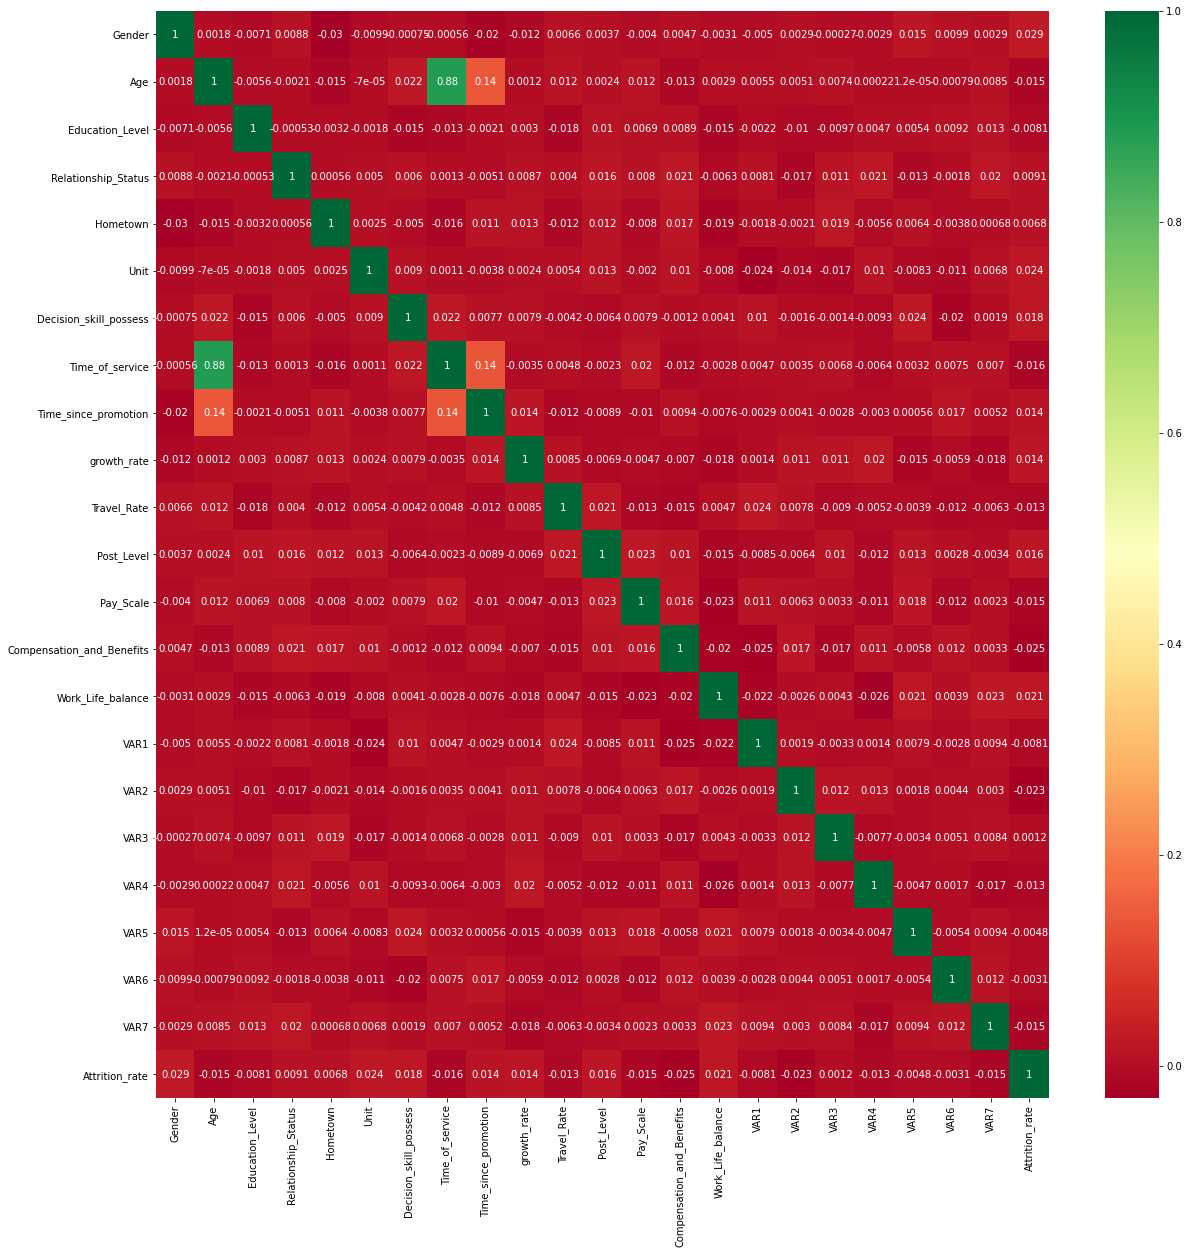

In [ ]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_ss = sc.fit_transform(X)
test_ss = sc.fit_transform(test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
import xgboost
regressor=xgboost.XGBRegressor()

In [ ]:

booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [ ]:

## Hyper Parameter Optimization


n_estimators = [100,200,300,400,500,600, 700,800, 900,1000, 1100,1200, 1300,1400,1500]
max_depth = [2, 3,4, 5, 6,7, 8,9, 10,11,12,13,14, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20,0.30, 0.40]
min_child_weight=[1,2,3,4,5]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 6,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(bf,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    9.9s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:   40.1s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 250 out of 250 | elapsed:  2.8min finished


[05:03:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                 

In [ ]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=12, min_child_weight=3, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=12, min_child_weight=3, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
regressor.fit(bf,y)

[05:05:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=12, min_child_weight=3, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
preds_tr = regressor.predict(bf)
rmse = np.sqrt(mean_squared_error(y, preds_tr))
print("RMSE: %f" % (rmse))
score = 100*max(0,1-rmse)
score

RMSE: 0.185624


81.43762213272372

In [ ]:
xgb_preds = regressor.predict(tf)

In [ ]:
xgb_preds

array([0.19439329, 0.18780997, 0.19550785, ..., 0.18468422, 0.18344086,
       0.19113874], dtype=float32)

In [ ]:
sam = pd.DataFrame()
sam['Employee_ID'] = ids
sam['Attrition_rate'] = xgb_preds
sam.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.194393
1,EID_9658,0.187810
2,EID_22203,0.195508
3,EID_7652,0.194795
4,EID_6516,0.194393


In [ ]:
sam.to_csv("hck_xgbht_bf_1.csv", index=False)

In [ ]:
joblib.dump(regressor,'xgb_model3')

['xgb_model3']

In [ ]:
xm = joblib.load('xgb_model3')

[03:58:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xm.fit(X_new,y_new)

[03:59:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=12, min_child_weight=3, missing=nan, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
preds_tr = xm.predict(X_new)
rmse = np.sqrt(mean_squared_error(y_new, preds_tr))
print("RMSE: %f" % (rmse))
score = 100*max(0,1-rmse)
score

RMSE: 0.155137


84.4863024691464

In [ ]:
preds = xm.predict(test)


In [ ]:
preds

array([0.19873305, 0.19114658, 0.18633349, ..., 0.17737097, 0.17440066,
       0.19384804], dtype=float32)

In [ ]:
sam = pd.DataFrame()
sam['Employee_ID'] = ids
sam['Attrition_rate'] = preds
sam.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.198733
1,EID_9658,0.191147
2,EID_22203,0.186333
3,EID_7652,0.195286
4,EID_6516,0.197741


In [ ]:
sam.to_csv("hck_xgbht_21.csv", index=False)

In [ ]:
X.shape, y.shape

((7000, 22), (7000,))

In [ ]:
bf = pd.DataFrame(X[['Gender','Unit','Compensation_and_Benefits']])

In [ ]:
tf = pd.DataFrame(test[['Gender','Unit','Compensation_and_Benefits']])

In [ ]:
xgb_preds = pd.DataFrame(preds)

fms = [y,xgb_preds]
y_new = pd.concat(fms)

In [ ]:
import statsmodels.api as sm

In [ ]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


['Gender', 'Compensation_and_Benefits', 'Unit']

In [ ]:
X.shape,y.shape

((7000, 22), (7000,))

In [ ]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [ ]:
backward_elimination(X,y)

['Gender', 'Unit', 'Compensation_and_Benefits']

In [ ]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [ ]:
stepwise_selection(X,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


['Gender', 'Compensation_and_Benefits', 'Unit']

In [ ]:
frames = [X_new,test]
X_new = pd.concat(frames)

In [ ]:
X_new.shape, y_new.shape

((13000, 22), (10000, 1))

In [ ]:
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
joblib.dump(regressor,'xgb_model3')

['xgb_model3']

In [ ]:
xm = joblib.load('xgb_model3')

[07:59:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xm.fit(X_ss,y)

[08:00:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=13, min_child_weight=5, missing=nan, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
preds_tr = xm.predict(X_ss)
rmse = np.sqrt(mean_squared_error(y, preds_tr))
print("RMSE: %f" % (rmse))
score = 100*max(0,1-rmse)
score

RMSE: 0.185195


81.48047455970308

In [ ]:
preds = xm.predict(test_ss)

In [ ]:
preds

array([0.20233649, 0.1932063 , 0.19028193, ..., 0.17670542, 0.1679674 ,
       0.19267493], dtype=float32)

In [ ]:
sam = pd.DataFrame()
sam['Employee_ID'] = ids
sam['Attrition_rate'] = preds
sam.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.202336
1,EID_9658,0.193206
2,EID_22203,0.190282
3,EID_7652,0.213129
4,EID_6516,0.194747


In [ ]:
sam.to_csv("hck_ss_xgbht_1.csv", index=False)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()

In [ ]:
## Hyper Parameter Optimization

n_estimators = [100,200,300,400,500,600, 700,800, 900,1000, 1100,1200, 1300,1400,1500]
max_depth = [2, 3,4, 5, 6,7, 8,9, 10,11,12,13,14, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20,0.30, 0.40]
min_samples_split=[1,2,3,4,5]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_samples_split':min_samples_split,
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Set up the random search with 4-fold cross validation
random_cv2 = RandomizedSearchCV(estimator=model,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 6,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv2.fit(bf,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:   14.7s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:   59.6s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 250 out of 250 | elapsed:  4.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [ ]:
random_cv2.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=3,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
model = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=3,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
model.fit(bf,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=3,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
preds_tr = model.predict(bf)
rmse = np.sqrt(mean_squared_error(y, preds_tr))
print("RMSE: %f" % (rmse))
score = 100*max(0,1-rmse)
score

RMSE: 0.184996


81.50039991906894

In [ ]:
gb_preds = model.predict(tf)

In [ ]:
gb_preds

array([0.20047427, 0.18611459, 0.18619441, ..., 0.1837075 , 0.17547414,
       0.18821671])

In [ ]:
sam = pd.DataFrame()
sam['Employee_ID'] = ids
sam['Attrition_rate'] = gb_preds
sam.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.200474
1,EID_9658,0.186115
2,EID_22203,0.186194
3,EID_7652,0.270951
4,EID_6516,0.200474


In [ ]:
sam.to_csv("hck_grd_bf_1.csv", index=False)

In [ ]:
joblib.dump(model,'grd_model1')

['grd_model1']

In [ ]:
xm = joblib.load('grd_model1')

In [ ]:
xm.fit(X_ss,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=3,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
preds_tr = xm.predict(X_ss)
rmse = np.sqrt(mean_squared_error(y, preds_tr))
print("RMSE: %f" % (rmse))
score = 100*max(0,1-rmse)
score

RMSE: 0.180228


81.97715177408172

In [ ]:
preds = xm.predict(test_ss)

In [ ]:
preds

array([0.21765393, 0.21217961, 0.16246589, ..., 0.16785953, 0.16756976,
       0.22603936])

In [ ]:
rmse = np.sqrt(mean_squared_error(gb_preds, preds))
print("RMSE: %f" % (rmse))
score = 100*max(0,1-rmse)
score

RMSE: 0.006004


99.39963527085726

In [ ]:
sam = pd.DataFrame()
sam['Employee_ID'] = ids
sam['Attrition_rate'] = preds
sam.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.217654
1,EID_9658,0.212180
2,EID_22203,0.162466
3,EID_7652,0.217505
4,EID_6516,0.238739


In [ ]:
sam.to_csv("hck_ss_grdb_1.csv", index=False)

In [ ]:
final_preds = gb_preds*0.75 + xgb_preds*0.25

In [ ]:
final_preds

array([0.21232212, 0.20697444, 0.16707524, ..., 0.17084977, 0.16897587,
       0.21797882])

In [ ]:
sam = pd.DataFrame()
sam['Employee_ID'] = ids
sam['Attrition_rate'] = final_preds
sam.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.212322
1,EID_9658,0.206974
2,EID_22203,0.167075
3,EID_7652,0.212308
4,EID_6516,0.227894


In [ ]:
sam.to_csv("hck_comb_13.csv", index=False)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model= AdaBoostRegressor()

In [ ]:
## Hyper Parameter Optimization

n_estimators = [100,200,300,400,500,600, 700,800, 900,1000, 1100,1200, 1300,1400,1500]
#max_depth = [2, 3,4, 5, 6,7, 8,9, 10,11,12,13,14, 15]
#booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20,0.30, 0.40]
#min_samples_split=[1,2,3,4,5]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'learning_rate':learning_rate
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Set up the random search with 4-fold cross validation
random_cv3 = RandomizedSearchCV(estimator=model,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 6,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv3.fit(bf,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:   14.8s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:   35.3s
[Parallel(n_jobs=6)]: Done 250 out of 250 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=AdaBoostRegressor(base_estimator=None,
                                               learning_rate=1.0, loss='linear',
                                               n_estimators=50,
                                               random_state=None),
                   iid='deprecated', n_iter=50, n_jobs=6,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.3, 0.4],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=True, scoring='neg_mean_absolute_error',
        

In [ ]:
random_cv3.best_estimator_

AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
                  n_estimators=100, random_state=None)

In [ ]:
model = AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
                  n_estimators=100, random_state=None)

In [ ]:
model.fit(bf,y)

AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
                  n_estimators=100, random_state=None)

In [ ]:
preds_tr = model.predict(bf)
rmse = np.sqrt(mean_squared_error(y, preds_tr))
print("RMSE: %f" % (rmse))
score = 100*max(0,1-rmse)
score

RMSE: 0.193806


80.6194466993714

In [ ]:
ad_preds = model.predict(tf)

In [ ]:
sam = pd.DataFrame()
sam['Employee_ID'] = ids
sam['Attrition_rate'] = ad_preds
sam.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.245524
1,EID_9658,0.238509
2,EID_22203,0.255636
3,EID_7652,0.286677
4,EID_6516,0.245524


In [ ]:
sam.to_csv("hck_ada_bf_1.csv", index=False)

In [ ]:
joblib.dump(model,'ada_model1')

['ada_model1']